# Initial Graphs

Graphing data for exploratory data analysis.

In [22]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('Data/merged.csv')
df.head()

,City,State,Year,Max AQI,ua_pop,tc_goal,treecanopy,tc_gap,priority_i,pctpocnorm,...,dep_perc,depratnorm,lingnorm,health_nor,temp_norm,tesctyscor,child_perc,seniorperc,land_area,biome
0,Birmingham,Alabama,2018,42.0,776256.0,0.473593,NaN,NaN,0.475231,0.76893,...,0.34563,0.3093,0.119654,0.501625,0.579516,75.0,0.172472,0.173158,274.914022,Forest
1,Birmingham,Alabama,2018,46.0,776256.0,0.473593,NaN,NaN,0.475231,0.76893,...,0.34563,0.3093,0.119654,0.501625,0.579516,75.0,0.172472,0.173158,274.914022,Forest
2,Birmingham,Alabama,2018,36.0,776256.0,0.473593,NaN,NaN,0.475231,0.76893,...,0.34563,0.3093,0.119654,0.501625,0.579516,75.0,0.172472,0.173158,274.914022,Forest
3,Birmingham,Alabama,2018,40.0,776256.0,0.473593,NaN,NaN,0.475231,0.76893,...,0.34563,0.3093,0.119654,0.501625,0.579516,75.0,0.172472,0.173158,274.914022,Forest
4,Birmingham,Alabama,2018,49.0,776256.0,0.473593,NaN,NaN,0.475231,0.76893,...,0.34563,0.3093,0.119654,0.501625,0.579516,75.0,0.172472,0.173158,274.914022,Forest


## Missing Data

The tree canopy and tc_gap columns are mostly NAs so they can be dropped.

In [24]:
df.isnull().sum()

City              0
State             0
Year              0
Max AQI           0
ua_pop            0
tc_goal           0
treecanopy    85388
tc_gap        85388
priority_i        0
pctpocnorm        0
pctpovnorm        0
unemplnorm        0
dep_perc          0
depratnorm        0
lingnorm          0
health_nor        0
temp_norm         0
tesctyscor        0
child_perc        0
seniorperc        0
land_area         0
biome             0
dtype: int64

In [25]:
df = df.drop(['treecanopy', 'tc_gap'], axis = 1)

In [26]:
df.head()

,City,State,Year,Max AQI,ua_pop,tc_goal,priority_i,pctpocnorm,pctpovnorm,unemplnorm,dep_perc,depratnorm,lingnorm,health_nor,temp_norm,tesctyscor,child_perc,seniorperc,land_area,biome
0,Birmingham,Alabama,2018,42.0,776256.0,0.473593,0.475231,0.76893,0.508043,0.131399,0.34563,0.3093,0.119654,0.501625,0.579516,75.0,0.172472,0.173158,274.914022,Forest
1,Birmingham,Alabama,2018,46.0,776256.0,0.473593,0.475231,0.76893,0.508043,0.131399,0.34563,0.3093,0.119654,0.501625,0.579516,75.0,0.172472,0.173158,274.914022,Forest
2,Birmingham,Alabama,2018,36.0,776256.0,0.473593,0.475231,0.76893,0.508043,0.131399,0.34563,0.3093,0.119654,0.501625,0.579516,75.0,0.172472,0.173158,274.914022,Forest
3,Birmingham,Alabama,2018,40.0,776256.0,0.473593,0.475231,0.76893,0.508043,0.131399,0.34563,0.3093,0.119654,0.501625,0.579516,75.0,0.172472,0.173158,274.914022,Forest
4,Birmingham,Alabama,2018,49.0,776256.0,0.473593,0.475231,0.76893,0.508043,0.131399,0.34563,0.3093,0.119654,0.501625,0.579516,75.0,0.172472,0.173158,274.914022,Forest


In [30]:
# dividing data
numerical_features = df.drop(['City', 'State', 'Year', 'biome', 'Max AQI'], axis = 1)
categorical_features = df[['City', 'State', 'Year', 'biome']]
df_y = df['Max AQI']

## Numeric Data

              ua_pop   tc_goal  priority_i  pctpocnorm  pctpovnorm  \
ua_pop      1.000000 -0.182392   -0.086376    0.272598   -0.196469   
tc_goal    -0.182392  1.000000   -0.089514   -0.090350    0.072758   
priority_i -0.086376 -0.089514    1.000000    0.708674    0.750466   
pctpocnorm  0.272598 -0.090350    0.708674    1.000000    0.357204   
pctpovnorm -0.196469  0.072758    0.750466    0.357204    1.000000   
unemplnorm -0.338436 -0.030126    0.575492    0.162767    0.380593   
dep_perc   -0.226144  0.145938    0.306639    0.140062    0.217500   
depratnorm -0.230648  0.130529    0.275333    0.169751    0.173677   
lingnorm   -0.114665 -0.196762    0.723758    0.286064    0.449628   
health_nor -0.418271 -0.002013    0.623192    0.101034    0.606107   
temp_norm   0.114733 -0.139946    0.535734    0.319098    0.317254   
tesctyscor  0.035057  0.101597   -0.676658   -0.351496   -0.395406   
child_perc -0.049347 -0.119332    0.460573    0.522141    0.207139   
seniorperc -0.212822

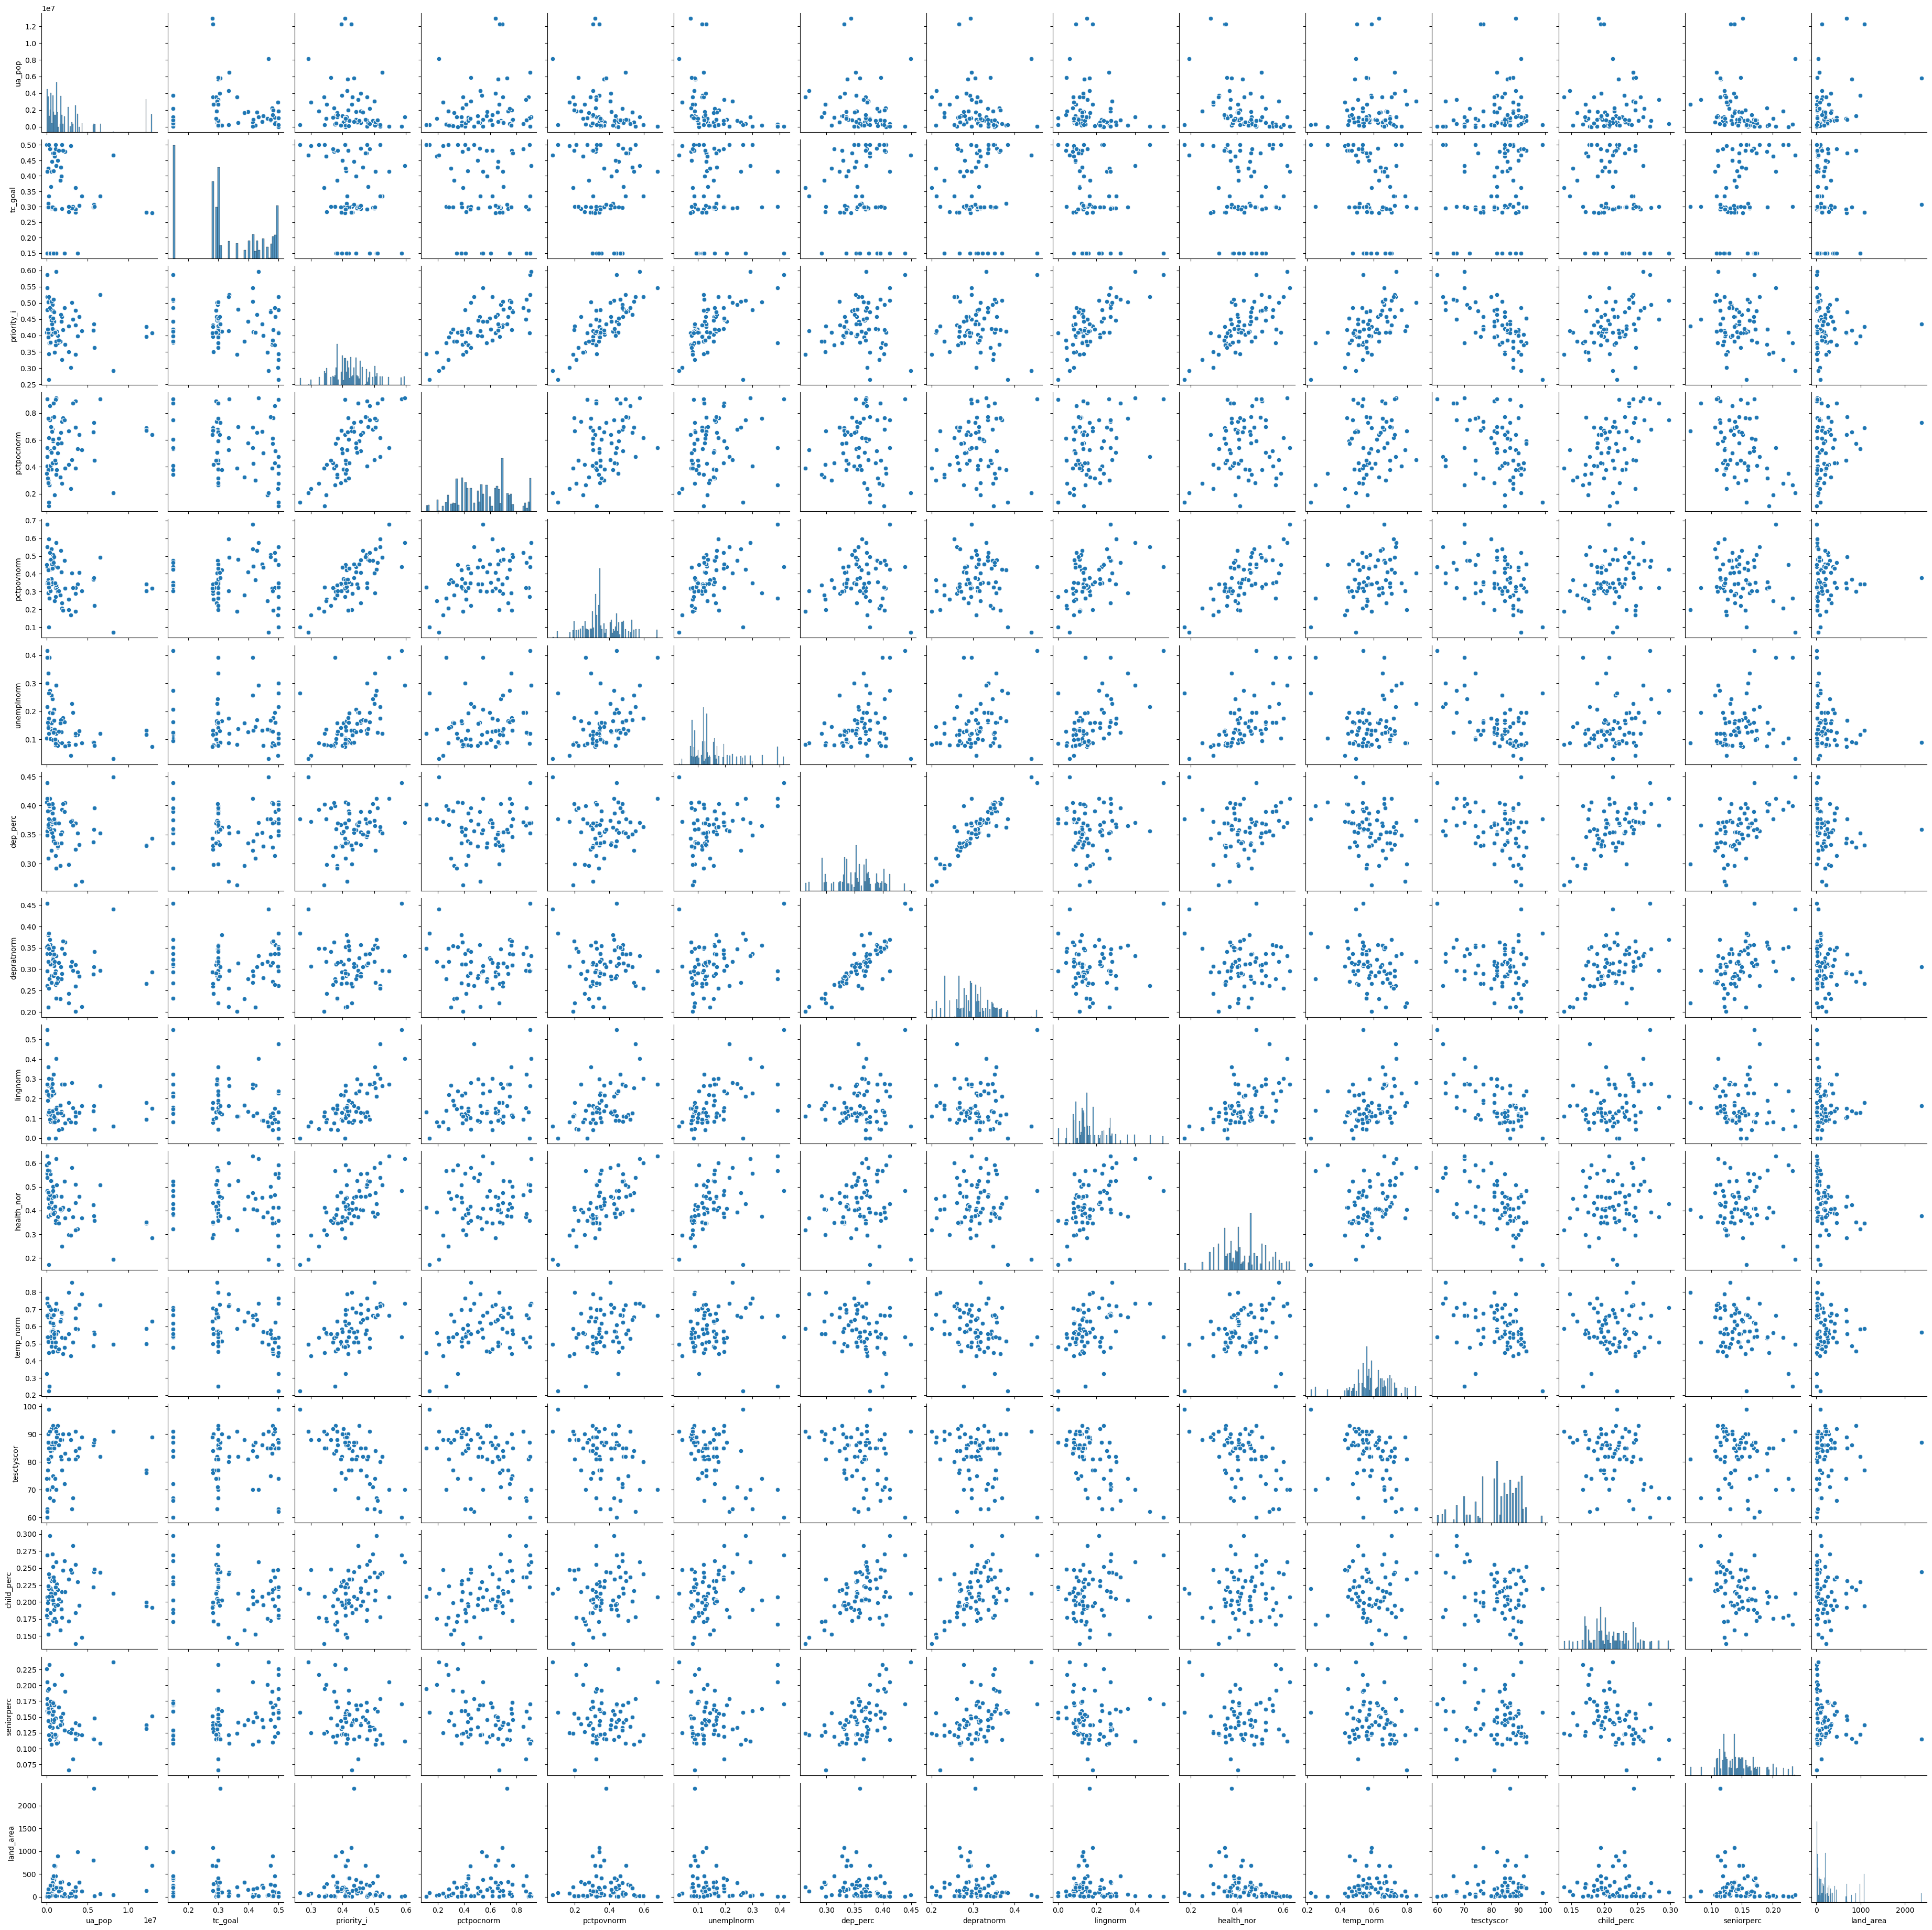

In [31]:
matrix = numerical_features.corr()
print(matrix)
sns.pairplot(numerical_features)

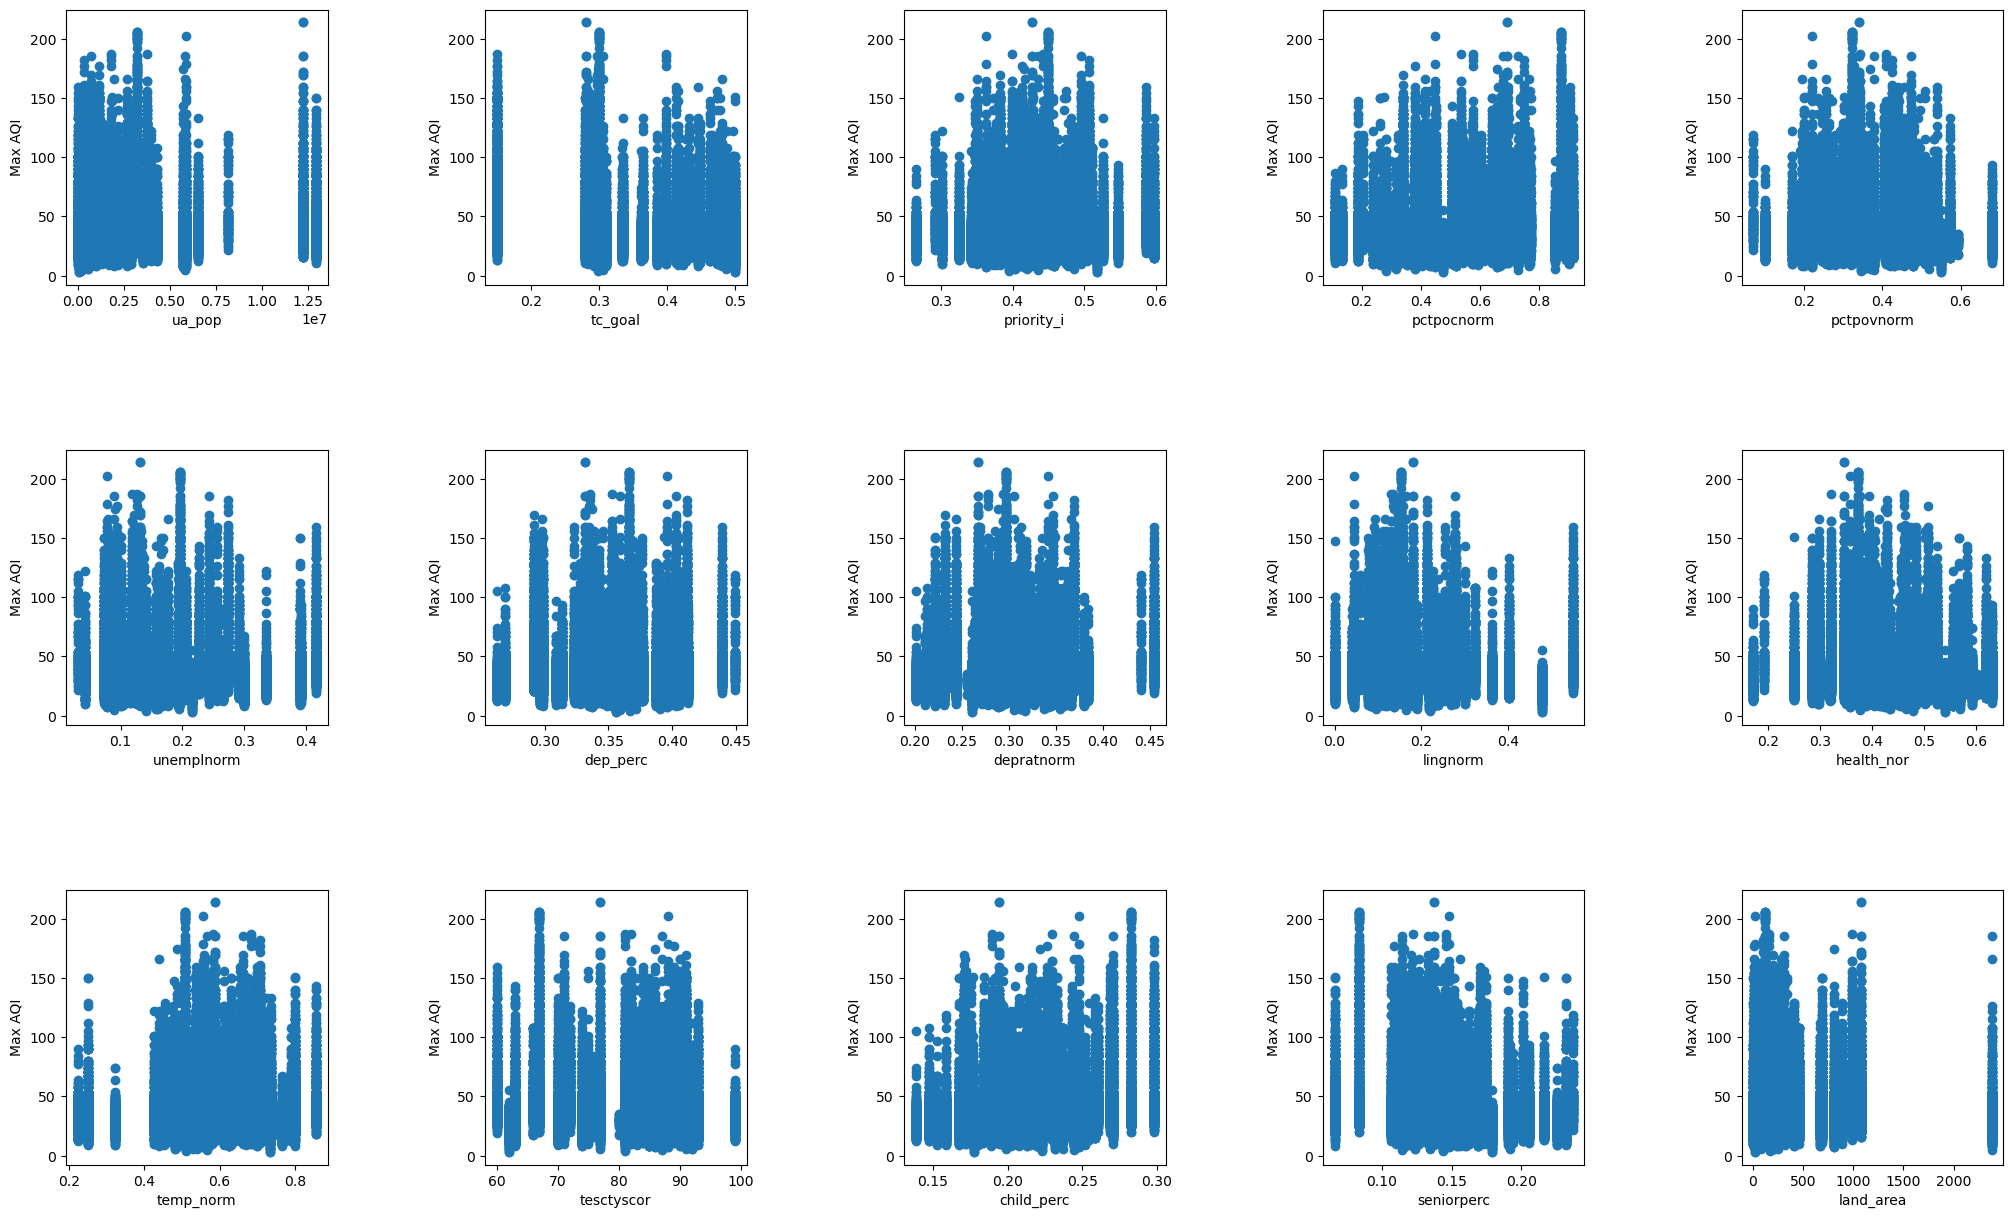

In [63]:
fig, axarr = plt.subplots(3, 5, figsize=(25, 15))
plt.subplots_adjust(hspace = .6, wspace = .6)

col = numerical_features.columns
count = 1
counter1 = 0
counter2 = 0
for c in col:
    axarr[counter1, counter2].scatter(data = df, x = c, y = 'Max AQI')
    axarr[counter1, counter2].set_xlabel(c)
    axarr[counter1, counter2].set_ylabel("Max AQI")
    count += 1
    if count in range(0,6):
        counter2 += 1
    if count == 6:
            counter2 = -1
            counter1 = 1
    if count in range(6,11):
        counter2 += 1
    if count == 11:
        counter2 = -1
        counter1 = 2
    if count in range(11,20):
        counter2 += 1

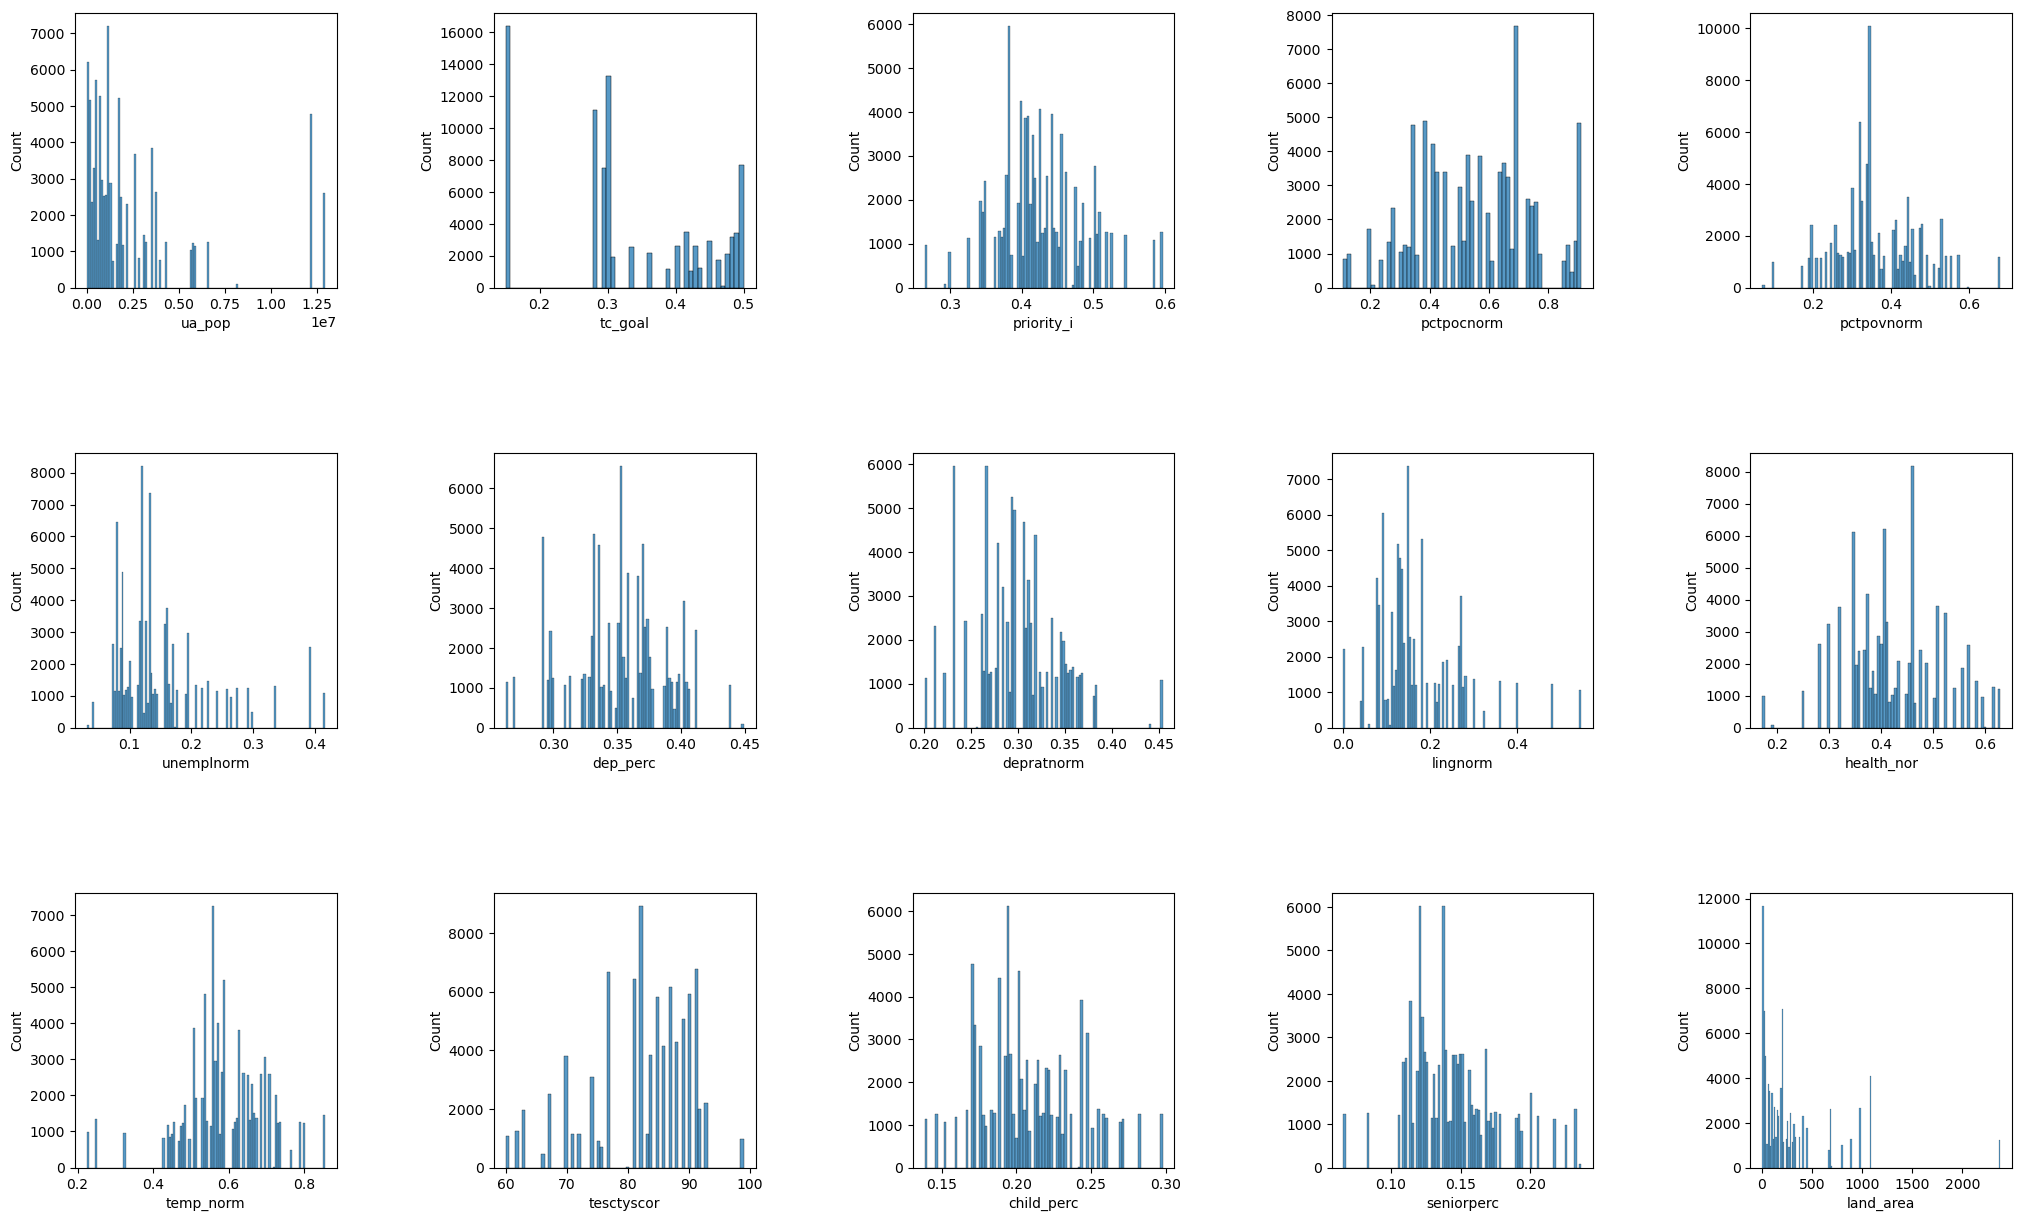

In [72]:
fig, axarr = plt.subplots(3, 5, figsize=(25, 15))
plt.subplots_adjust(hspace = .6, wspace = .6)

col = numerical_features.columns
count = 1
counter1 = 0
counter2 = 0
for c in col:
    sns.histplot(ax = axarr[counter1, counter2], data = df, x = c)
    axarr[counter1, counter2].set_xlabel(c)
    count += 1
    if count in range(0,6):
        counter2 += 1
    if count == 6:
            counter2 = -1
            counter1 = 1
    if count in range(6,11):
        counter2 += 1
    if count == 11:
        counter2 = -1
        counter1 = 2
    if count in range(11,20):
        counter2 += 1

## Categorical Data

<Axes: xlabel='biome', ylabel='count'>

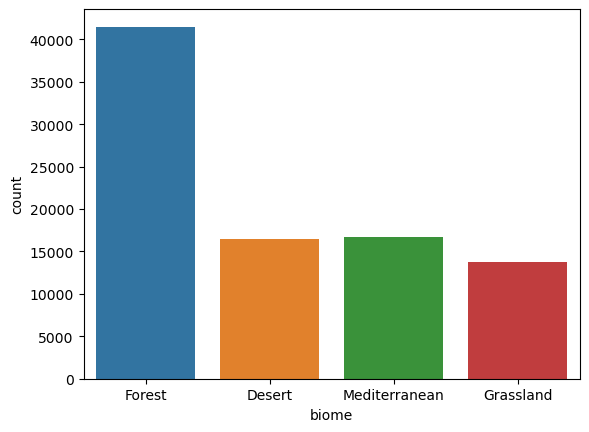

In [76]:
sns.countplot(data = df, x='biome')

<Axes: xlabel='Max AQI', ylabel='biome'>

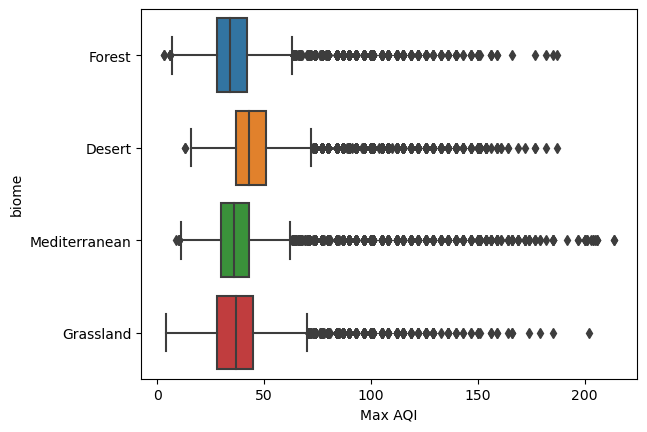

In [78]:
sns.boxplot(data=df, y='biome', x = 'Max AQI')

<Axes: xlabel='Year', ylabel='count'>

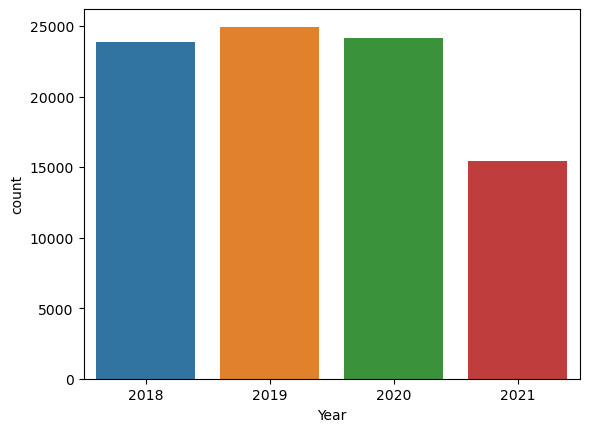

In [79]:
sns.countplot(data = df, x='Year')

<Axes: xlabel='Max AQI', ylabel='Year'>

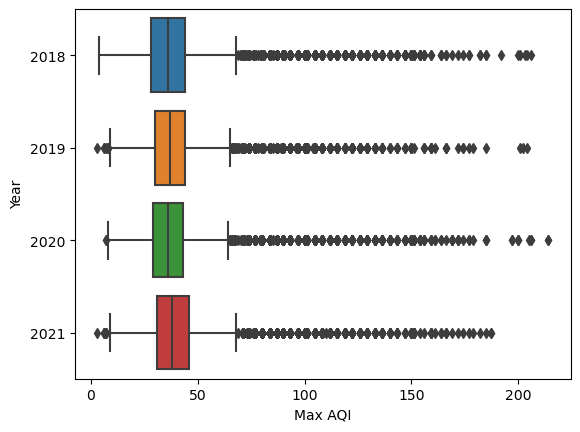

In [84]:
df["Year"] = df["Year"].astype("category")
sns.boxplot(data=df, y = 'Year', x = 'Max AQI')

In [85]:
df["State"].value_counts()

California        20257
Utah               5955
Ohio               4225
Arizona            3990
Texas              3868
Colorado           3670
Virginia           2838
New York           2613
Missouri           2587
North Carolina     2562
New Jersey         2500
Nevada             2437
Maryland           2332
Maine              2027
Pennsylvania       1987
Oklahoma           1844
Rhode Island       1717
Iowa               1430
Arkansas           1369
Louisiana          1315
Massachusetts      1265
New Mexico         1259
North Dakota       1244
South Dakota       1222
Connecticut        1211
Oregon             1191
Washington         1133
Florida            1130
Kentucky           1069
Delaware           1061
New Hampshire       972
Kansas              933
Alabama             918
Minnesota           816
Mississippi         773
Alaska              500
Illinois             89
Tennessee            61
Name: State, dtype: int64

In [86]:
df["City"].value_counts()

Salt Lake City    4767
Los Angeles       4069
Phoenix           2638
Cleveland         2624
New York          2613
                  ... 
Fairbanks          500
El Paso            470
Northbrook          89
Memphis             61
York                24
Name: City, Length: 68, dtype: int64